# Language Model

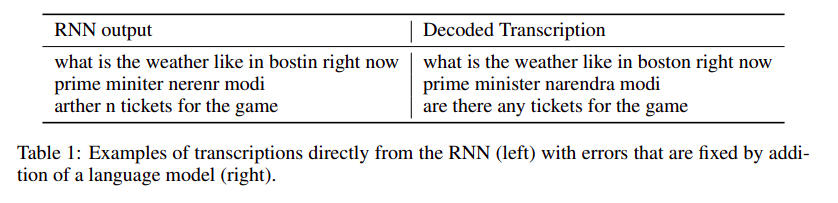
[source paper](https://arxiv.org/pdf/1412.5567.pdf)

 - Decoder is itself already a "language model"
 - Separate model can help correct ASR output
 - Trained on text instead of audio 
   - More Specialized

## Name Generator
### Code taken and modified from [pskrunner14](https://github.com/pskrunner14/char-level-rnn)

## Flag options, meanings, and defaults
| flag   | long flag       | datatype | description | default |
|--------|-----------------|----------|-------------|---------|
| f      | --filename      | PATH     | path for the training data file                    | [data/names] |
| rt     | --rnn-type      | TEXT     | type of RNN layer to use                           | [LSTM] |
| nl     |--num-layers     | INTEGER  | number of layers in RNN                            | [2] |
| dr     | --dropout       | FLOAT    | dropout value for RNN layers                       | [0.2] |
| es     | --emb-size      | INTEGER  | size of the each embedding                         | [64] |
| hs     | --hidden-size   | INTEGER  | number of hidden RNN units                         | [256] |
| n      | --num-epochs    | INTEGER  | number of epochs for training                      | [50] |
| bz     | --batch-size    | INTEGER  | number of samples per mini-batch                   | [32] |
| lr     | --learning-rate | FLOAT    | learning rate for the adam optimizer               | [0.0002] |
| se     | --save-every    | INTEGER  | epoch interval for saving the model                | [10] |
| ns     | --num-samples   | INTEGER  | number of samples to generate after epoch interval | [5] |
| sp     | --seed-phrase   | TEXT     | seed phrase to feed the RNN for sampling           | [SOS_TOKEN] |
| sa     | --sample-every  | INTEGER  | epoch interval for sampling new sequences          | [5] |
|        | --help          |          | Show this message and exit. ||  
note: some values may have been adjusted 

In [1]:
cd ..

/home/nils/workspace/iu-hse-asr-workshop


In [ ]:
# def train(filename, rnn_type, num_layers, dropout, emb_size, 
#           hidden_size, num_epochs, batch_size, learning_rate, 
#           num_samples, seed_phrase, sample_every):

In [ ]:
# names demo values
filename = 'src/lm/data/names'
rnn_type = 'LSTM'
num_layers = 2
dropout = .2
emb_size = 64
hidden_size = 256
num_epochs = 50
batch_size = 32
learning_rate = 0.0002
num_samples = 5
seed_phrase = '[ASR OUTPUT]'
sample_every = 5

In [ ]:
!python3 src/lm/train.py -f src/lm/data/names

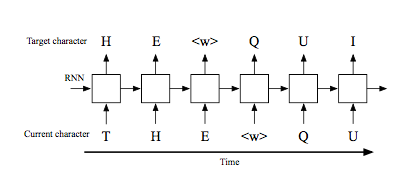
https://wiki.ubc.ca/Course:CPSC522/Character_Level_Language_Models_using_LSTM

In [3]:
from src.LM import LanguageModel
lm = LanguageModel()

In [4]:
model, token_to_idx, idx_to_token = lm.train(filename = "data/transcripts.txt", num_layers=2, dropout=0.05, emb_size=100, hidden_size=200, num_epochs=5, batch_size=10, learning_rate=0.01)

/home/nils/.local/lib/python3.7/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0
Epoch[1/5]:   5%|▍         | 4/83 [00:00<00:02, 37.90it/s]

шесть


In [7]:
lm.score(model, token_to_idx, idx_to_token, "десять")
lm.score(model, token_to_idx, idx_to_token, "дстятяь")

score: #десять
score: [0, 2, 4, 18, 13, 12, 3]
# 0 6.121863e-06
д 2 0.00012195645
е 4 7.995132e-05
с 18 1.1637683e-05
я 13 0.00014528465
т 12 0.0027504181
ь 3 6.5691593e-06
SCORE: 0.0031219392753882858
score: #дстятяь
score: [0, 2, 18, 12, 13, 12, 13, 3]
# 0 6.347672e-06
д 2 9.6596006e-05
с 18 2.497002e-07
т 12 0.1314151
я 13 0.00010799335
т 12 0.002065096
я 13 5.0722715e-06
ь 3 3.1485733e-06
SCORE: 0.13369960252910573


0.13369960252910573

## Famous Language Models

| name | year | size (parameters) | creator |  
|------|------|-------------------|---------|
| BERT | 2018 | 110M | Google |
| GPT  | 2018 | 117M | OpenAI | 
| GPT-3 | 2020 | 175B | OpenAI |

Why might this be problematic? 